![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [45]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
netflix_df = pd.read_csv('netflix_data.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [46]:
tv_shows = netflix_df['type']=='TV Show'
netflix_tvshows = netflix_df[tv_shows]
netflix_subset = netflix_df[~tv_shows]
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [47]:
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [48]:
short_movies = netflix_movies[netflix_movies['duration']<60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [49]:
short_movies.groupby('country')['duration'].mean().sort_values()

country
Pakistan          16.000000
Georgia           24.000000
Namibia           29.000000
South Africa      30.000000
Australia         33.000000
Poland            33.000000
Netherlands       34.500000
Canada            35.181818
Sweden            40.000000
Spain             41.000000
Ireland           41.500000
Japan             41.555556
United States     42.068493
Germany           43.666667
Denmark           44.000000
India             45.750000
United Kingdom    47.133333
Mexico            47.666667
Italy             49.000000
France            49.428571
Brazil            49.666667
Argentina         50.000000
Czech Republic    52.000000
Iceland           54.000000
South Korea       54.000000
Israel            55.000000
Norway            58.000000
Colombia          59.000000
Name: duration, dtype: float64

In [50]:
short_movies.groupby('genre')['duration'].agg(['count', 'mean']).sort_values(by='mean')

,count,mean
genre,,
Dramas,12,27.166667
Horror Movies,1,29.000000
Children,107,34.271028
Uncategorized,40,34.675000
International Movies,3,41.666667
Classic Movies,8,42.625000
Action,6,43.500000
Documentaries,151,44.589404
Comedies,15,45.800000


In [51]:
short_movies.groupby('release_year')['duration'].agg(['count', 'mean']).sort_values(by='mean')

,count,mean
release_year,,
1978,1,25.000000
1990,1,30.000000
2021,3,33.333333
1942,2,35.000000
1991,3,35.666667
2020,68,36.411765
2003,1,37.000000
2011,11,40.000000
1944,2,40.000000


In [52]:
netflix_movies['genre'].unique()

array(['Dramas', 'Horror Movies', 'Action', 'Documentaries',
       'Independent Movies', 'Comedies', 'Sports Movies', 'Uncategorized',
       'International Movies', 'Sci-Fi', 'Children', 'Classic Movies',
       'Thrillers', 'Stand-Up', 'Anime Features', 'Music', 'Cult Movies',
       'Romantic Movies', 'LGBTQ Movies'], dtype=object)

In [11]:
for idx, row in netflix_movies.iterrows():
    if row['genre'] in colours_dict:
        netflix_movies.loc[idx,'genre'] = row['genre']
    else:
        netflix_movies.loc[idx,'genre'] = 'Other'

netflix_movies['genre'].unique()

array(['Other', 'Documentaries', 'Children', 'Stand-Up'], dtype=object)

In [ ]:
colours_dict = {"Children":'g', "Documentaries":'b', "Stand-Up":'r', "Other":'y'}
netflix_movies['colors'] = netflix_movies['genre'].apply(lambda x: colours_dict.get(x, 'y'))
netflix_movies[['genre', 'colors']]

In [12]:
netflix_movies.head(2)

,title,country,genre,release_year,duration
1,7:19,Mexico,Other,2016,93
2,23:59,Singapore,Other,2011,78


In [13]:
list(colours_dict.keys())

['Children', 'Documentaries', 'Stand-Up', 'Other']

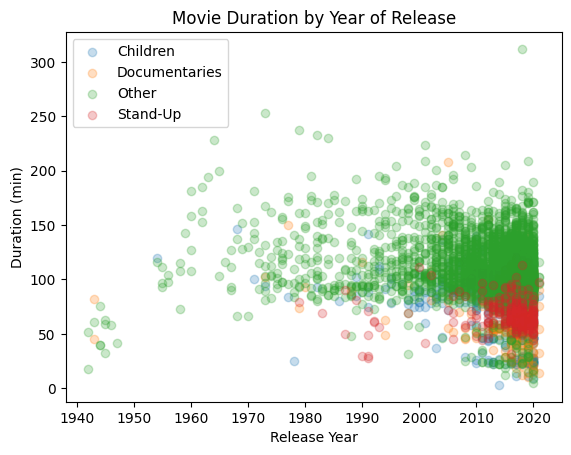

In [43]:
fig, ax = plt.subplots()
for genre, data in netflix_movies.groupby('genre'):
  ax.scatter(data['release_year'], data['duration'], label=genre, alpha=0.25)
plt.legend()
plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

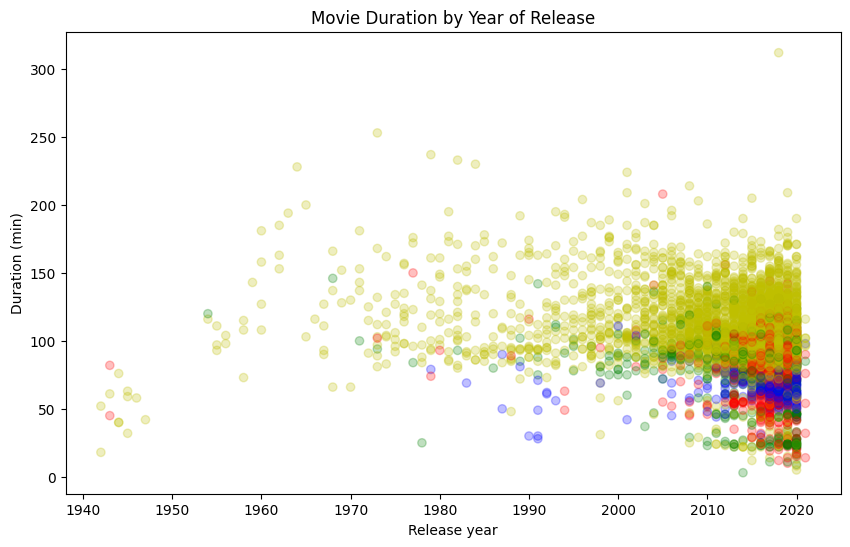

In [44]:
genre_group = {"Children":'g', "Documentaries":'r', "Stand-Up":'b'}
colors = []
for idx, row in netflix_movies.iterrows():
    # colors.append(genre_group.get(row['genre'], 'y'))
    if row['genre'] in genre_group:
        colors.append(genre_group[row['genre']])
    else:
        colors.append('y')
        
fig = plt.figure(figsize=(10,6))
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors, alpha=0.25)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()